In [10]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
# Import preprocessing tools from scikit-learn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler  # For encoding categorical variables and scaling features
# Import model selection tools from scikit-learn
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
# Import clustering tool from scikit-learn
from sklearn.cluster import KMeans  # For performing KMeans clustering
# Import metrics tools from scikit-learn
from sklearn.metrics import silhouette_score  # For evaluating clustering performance using silhouette score
from sklearn.linear_model import LinearRegression  # For linear regression modeling
from sklearn.metrics import confusion_matrix, classification_report  # For evaluating classification performance


In [11]:
data = pd.read_csv('/content/predictive_maintenance.csv')
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
5994,5995,L53174,L,300.6,310.4,1608,39.2,221,0,No Failure
5995,5996,L53175,L,300.6,310.3,1920,22.3,223,0,No Failure
5996,5997,M20856,M,300.5,310.2,1386,48.2,225,0,No Failure
5997,5998,M20857,M,300.5,310.2,1571,34.6,228,0,No Failure


In [12]:
# Step 2: Data Cleaning
# Drop rows with missing values
data = data.dropna()
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,5999.000000,5999.000000,5999.000000,5999.00000,5999.000000,5999.000000,5999.000000
mean,3000.000000,300.321537,309.921954,1539.97783,39.956526,108.939157,0.042340
std,1731.906464,2.283686,1.665163,182.91681,9.977120,63.961424,0.201381
min,1.000000,295.300000,305.700000,1168.00000,3.800000,0.000000,0.000000
25%,1500.500000,298.300000,308.600000,1422.00000,33.300000,54.000000,0.000000
50%,3000.000000,300.400000,309.700000,1504.00000,40.000000,109.000000,0.000000
75%,4499.500000,302.300000,311.100000,1612.00000,46.800000,164.000000,0.000000
max,5999.000000,304.500000,313.800000,2886.00000,76.200000,253.000000,1.000000


In [13]:
data.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [14]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through all columns in the dataset
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column is categorical
        # Apply label encoding to the column
        data[column] = label_encoder.fit_transform(data[column])
        # Display the mapping of original labels to numeric values for each column
        print(f"Encoded Labels for '{column}':")
        print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
        print()

# Optionally, check the first few rows of the dataset after encoding
print(data.head())


Encoded Labels for 'Product ID':
{'H29424': 0, 'H29425': 1, 'H29432': 2, 'H29434': 3, 'H29441': 4, 'H29452': 5, 'H29457': 6, 'H29462': 7, 'H29466': 8, 'H29481': 9, 'H29494': 10, 'H29500': 11, 'H29522': 12, 'H29525': 13, 'H29550': 14, 'H29552': 15, 'H29557': 16, 'H29560': 17, 'H29569': 18, 'H29571': 19, 'H29580': 20, 'H29581': 21, 'H29595': 22, 'H29606': 23, 'H29607': 24, 'H29610': 25, 'H29626': 26, 'H29635': 27, 'H29680': 28, 'H29682': 29, 'H29684': 30, 'H29691': 31, 'H29702': 32, 'H29707': 33, 'H29712': 34, 'H29716': 35, 'H29724': 36, 'H29734': 37, 'H29742': 38, 'H29743': 39, 'H29764': 40, 'H29767': 41, 'H29776': 42, 'H29783': 43, 'H29812': 44, 'H29855': 45, 'H29857': 46, 'H29865': 47, 'H29870': 48, 'H29874': 49, 'H29884': 50, 'H29885': 51, 'H29891': 52, 'H29909': 53, 'H29921': 54, 'H29949': 55, 'H29951': 56, 'H29957': 57, 'H29968': 58, 'H29978': 59, 'H29979': 60, 'H29990': 61, 'H29997': 62, 'H29998': 63, 'H30001': 64, 'H30005': 65, 'H30006': 66, 'H30008': 67, 'H30011': 68, 'H30013': 

In [15]:
# Map 'Failure Type' to numerical values for easier analysis
failure_mapping = {"No Failure": 0, "Heat Dissipation Failure": 1,
                   "Power Failure": 2, "Overstrain Failure": 3, "Random Failures": 4}
data['Failure Type'] = data['Failure Type'].map(failure_mapping)  # Apply the mapping

# Scale continuous features using MinMaxScaler
scaler = MinMaxScaler()  # Initialize the MinMaxScaler
# Define columns to be scaled
scaled_columns = ['Air temperature [K]', 'Process temperature [K]',
                  'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

In [16]:
# Split the data into features (X) and target (y)
X = data.drop(['UDI', 'Product ID','Target',], axis=1)  # Drop unnecessary columns for features
y = data['Target']  # Define the target variable

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

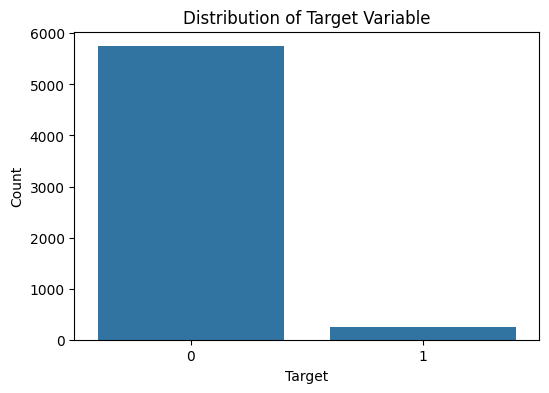

In [32]:
# **Step 3: Visualization**
# 1. Histogram/Bar Chart: Distribution of Target Variable
def plot_target_distribution(data, save=False, filename='target_distribution.png'):
    """
    Plots a count plot (bar chart) for the distribution of the target variable.

    Parameters:
    data (DataFrame): The DataFrame containing the target variable.
    save (bool): If True, saves the plot to a file. Default is False.
    filename (str): The filename to save the plot. Default is 'target_distribution.png'.
    """
    plt.figure(figsize=(6,4))  # Set figure size
    sns.countplot(x='Target', data=data)  # Create a count plot for the target variable
    plt.title("Distribution of Target Variable")  # Set plot title
    plt.xlabel("Target")  # Set x-axis label
    plt.ylabel("Count")  # Set y-axis label

    if save:
        plt.savefig(filename, bbox_inches='tight')  # Save the plot to a file if save is True

    plt.show()  # Display the plot

## plot the bar plot
plot_target_distribution(data, save=True, filename='target_distribution.png')

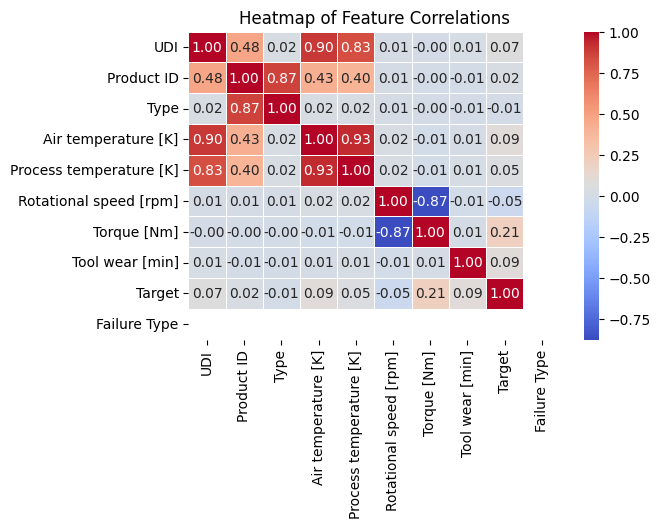

In [33]:
## heatmap
def plot_and_save_heatmap(data, filename):
    """
    Plots and saves a heatmap of the correlations between numerical features in the DataFrame.

    Parameters:
    data (DataFrame): The DataFrame containing the numerical features to be correlated.
    filename (str): The name of the file to save the plot.
    """
    # Calculate the correlation matrix
    corr = data.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(6,4))  # Set figure size

    # Generate a heatmap
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})

    # Set plot title
    plt.title("Heatmap of Feature Correlations")

    # Save the plot to a file
    plt.savefig(filename, bbox_inches='tight')

    # Show the plot
    plt.show()

## plot
plot_and_save_heatmap(data, 'heatmap.png')

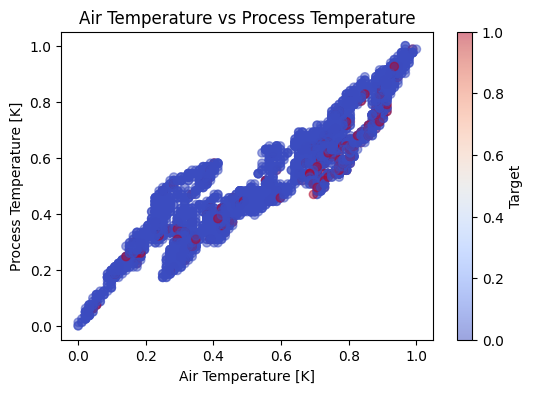

In [34]:
## scatter plot to find the relationship
def plot_scatter(data):
    """
    Plots a scatter plot of Air temperature vs Process temperature, colored by target values.

    Parameters:
    data (DataFrame): The DataFrame containing the 'Air temperature [K]', 'Process temperature [K]', and 'Target' columns.
    """
    plt.figure(figsize=(6, 4))  # Set figure size
    # Scatter plot of Air temperature vs Process temperature, colored by target values
    plt.scatter(data['Air temperature [K]'], data['Process temperature [K]'], alpha=0.5, c=data['Target'], cmap='coolwarm')
    plt.title("Air Temperature vs Process Temperature")  # Set plot title
    plt.xlabel("Air Temperature [K]")  # Set x-axis label
    plt.ylabel("Process Temperature [K]")  # Set y-axis label
    plt.colorbar(label='Target')  # Add a colorbar to represent the target variable
    plt.show()  # Display the plot

## plotting
plot_scatter(data)

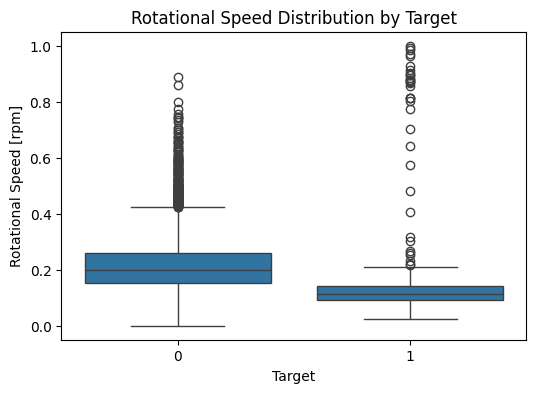

In [35]:
# 4. Box/Violin Plot: Rotational Speed grouped by Target
def plot_box_violin(data):
    """
    Plots a box plot for Rotational Speed grouped by Target.

    Parameters:
    data (DataFrame): The DataFrame containing the 'Target' and 'Rotational speed [rpm]' columns.
    """
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.boxplot(x='Target', y='Rotational speed [rpm]', data=data)  # Create a box plot for rotational speed grouped by target
    plt.title("Rotational Speed Distribution by Target")  # Set plot title
    plt.xlabel("Target")  # Set x-axis label
    plt.ylabel("Rotational Speed [rpm]")  # Set y-axis label
    plt.show()  # Display the plot
## plot the box plot
plot_box_violin(data)

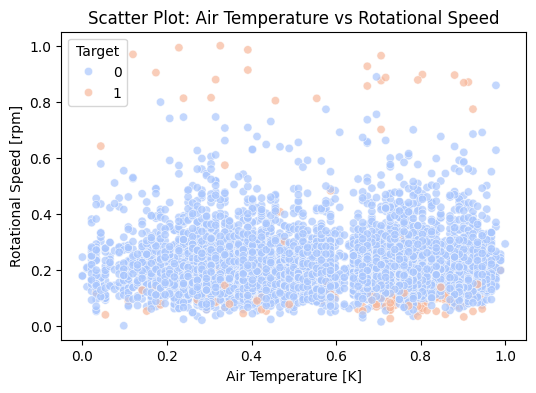

In [36]:
# **Scatter Plot: Air temperature vs Rotational speed**
def plot_scatter(data):
    """
    Plots a scatter plot of Air temperature vs Rotational speed, colored by target values.

    Parameters:
    data (DataFrame): The DataFrame containing the 'Air temperature [K]', 'Rotational speed [rpm]', and 'Target' columns.
    """
    plt.figure(figsize=(6, 4))  # Set figure size
    # Create scatter plot with Air temperature and Rotational speed
    sns.scatterplot(x=data['Air temperature [K]'], y=data['Rotational speed [rpm]'], hue=data['Target'], palette="coolwarm", alpha=0.7)
    plt.title("Scatter Plot: Air Temperature vs Rotational Speed")  # Add title
    plt.xlabel("Air Temperature [K]")  # Set x-axis label
    plt.ylabel("Rotational Speed [rpm]")  # Set y-axis label
    plt.legend(title="Target")  # Add legend
    plt.show()  # Display the plot
## plot the scatter
plot_scatter(data)

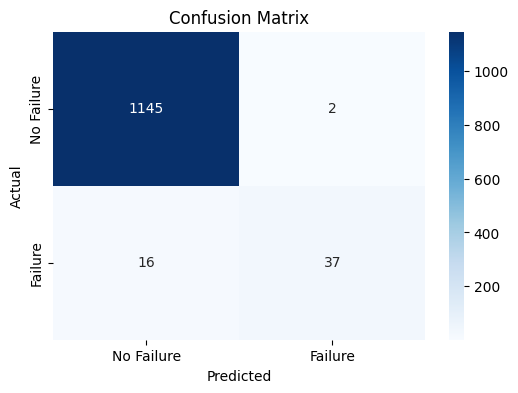

Classification Report:
              precision    recall  f1-score   support

  No Failure       0.99      1.00      0.99      1147
     Failure       0.95      0.70      0.80        53

    accuracy                           0.98      1200
   macro avg       0.97      0.85      0.90      1200
weighted avg       0.98      0.98      0.98      1200



In [23]:
# **Step 4: Simple Predictive Analysis**
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier
# Train a simple Random Forest model
clf = RandomForestClassifier(random_state=42)  # Initialize the classifier
clf.fit(X_train, y_train)  # Train the classifier on the training data
# Predict the target variable on the test data
y_pred = clf.predict(X_test)
# Generate a confusion matrix to evaluate model performance
conf_matrix = confusion_matrix(y_test, y_pred)
# Visualize the Confusion Matrix
plt.figure(figsize=(6,4))  # Set figure size
# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.title("Confusion Matrix")  # Set plot title
plt.xlabel("Predicted")  # Set x-axis label
plt.ylabel("Actual")  # Set y-axis label
plt.savefig("confusion_matrix.png")  # Save the plot as a PNG file
plt.show()  # Display the plot
# Generate and print the classification report
class_report = classification_report(y_test, y_pred, target_names=["No Failure", "Failure"])
print("Classification Report:")
print(class_report)  # Display the detailed metrics for precision, recall, F1-score, and support


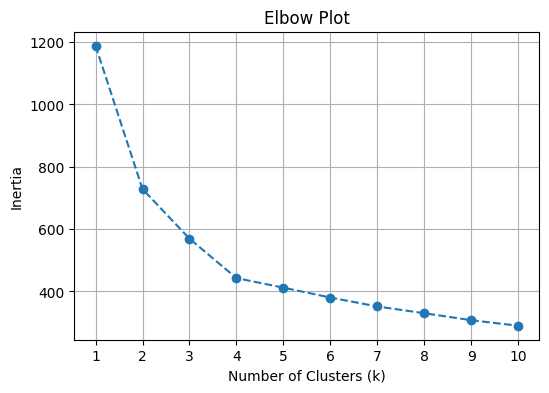

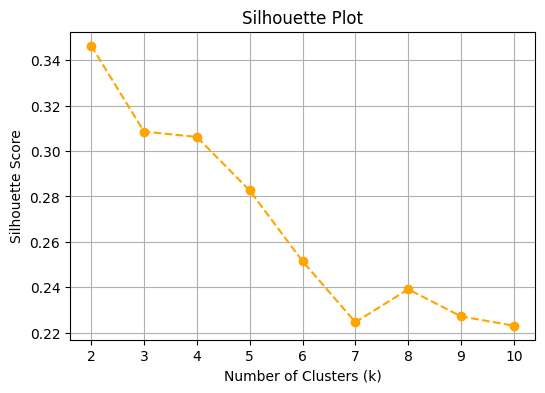

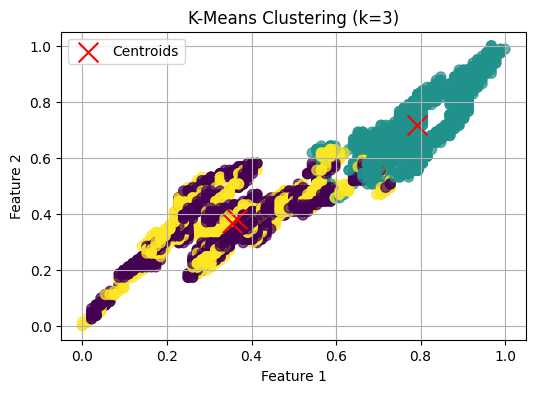

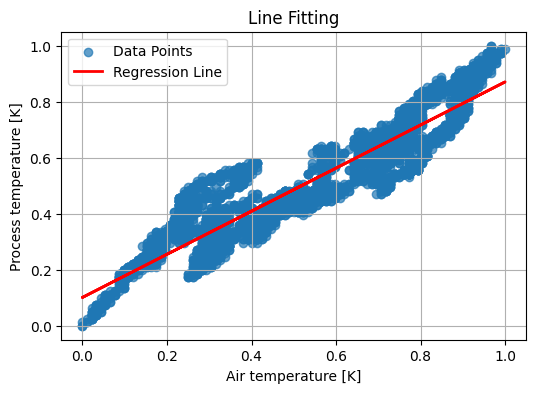

In [24]:
# Function to create an Elbow Plot
def elbow_plot(data, max_k=10):
    """
    Creates an elbow plot to determine the optimal number of clusters for K-means.
    """
    inertias = []  # List to store inertia values for each k

    # Iterate over cluster sizes from 1 to max_k
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)  # Append inertia (within-cluster sum of squares)

    # Plot the elbow curve
    plt.figure(figsize=(6,4))
    plt.plot(range(1, max_k + 1), inertias, marker='o', linestyle='--')
    plt.title('Elbow Plot')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(range(1, max_k + 1))
    plt.grid(True)
    plt.savefig("elbow_plot.png")  # Save the plot as a PNG file
    plt.show()

# Function to create a Silhouette Plot
def silhouette_plot(data, max_k=10):
    """
    Creates a silhouette plot to assess clustering quality for each k.
    """
    silhouette_scores = []  # List to store silhouette scores for each k

    # Iterate over cluster sizes from 2 to max_k
    for k in range(2, max_k + 1):  # Silhouette score requires at least 2 clusters
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))  # Append silhouette score

    # Plot the silhouette scores
    plt.figure(figsize=(6,4))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', linestyle='--', color='orange')
    plt.title('Silhouette Plot')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.xticks(range(2, max_k + 1))
    plt.grid(True)
    plt.savefig("silhouette_plot.png")  # Save the plot as a PNG file
    plt.show()

# Function to perform K-Means Clustering and display results
def kmeans_clustering(data, n_clusters=3):
    """
    Applies K-means clustering and displays a scatter plot of the clusters.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)

    # Plot the clusters
    plt.figure(figsize=(6,4))
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.title(f'K-Means Clustering (k={n_clusters})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.savefig("kmeans_clusters.png")  # Save the plot as a PNG file
    plt.show()

# Function for Line Fitting
def line_fitting(data, x_feature, y_feature):
    """
    Fits a line to the data and plots the regression line.
    """
    x = data[x_feature].values.reshape(-1, 1)  # Reshape to 2D for sklearn
    y = data[y_feature].values

    # Apply linear regression
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)  # Predict y values

    # Plot the data points and regression line
    plt.figure(figsize=(6,4))
    plt.scatter(x, y, alpha=0.7, label='Data Points')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title('Line Fitting')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend()
    plt.grid(True)
    plt.savefig("line_fitting_plot.png")  # Save the plot as a PNG file
    plt.show()

# Call functions to create plots
elbow_plot(data[scaled_columns])  # Elbow plot using scaled features
silhouette_plot(data[scaled_columns])  # Silhouette plot using scaled features
kmeans_clustering(data[scaled_columns], n_clusters=3)  # K-means clustering with 3 clusters
line_fitting(data, 'Air temperature [K]', 'Process temperature [K]')  # Line fitting example
